# MATH 210 Introduction to Mathematical Computing

## March 15, 2023

* Slope Fields
* Euler's Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Slope Fields

Consider a first order differential equation $y' = f(t,y)$. The **slope field** plots a small line of slope $f(t,y)$ at each point $(t,y)$ in a grid in the $ty$-plane. We can "see" solutions in the slope field by following the shapes of the lines.

Let's plot the slope field for the equation $y' = -ty$. The equation is separable and we are able to solve to find the general solution $y(t) = y(0)e^{-t^2/2}$.

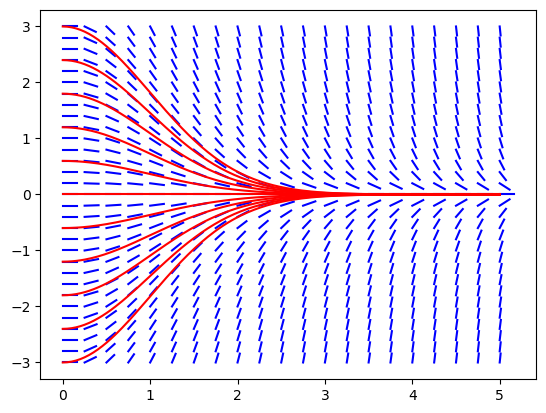

In [3]:
t0 = 0; t1 = 5; N = 21;
t = np.linspace(t0,t1,N)
y0 = -3; y1 = 3; M = 31;
y = np.linspace(y0,y1,M)
L = 0.8*min((t1-t0)/(N-1),(y1-y0)/(M-1))

f = lambda t,y: -t*y

for n in range(0,N):
    for m in range(0,M):
        slope = f(t[n],y[m])
        theta = np.arctan(slope)
        dt = L*np.cos(theta)
        dy = L*np.sin(theta)
        plt.plot([t[n],t[n]+dt],[y[m],y[m]+dy],'b-')

T = np.linspace(t0,t1,200)
for y0 in np.linspace(-3,3,11):
    Y = y0*np.exp(-T**2/2)
    plt.plot(T,Y,'r')
plt.show()

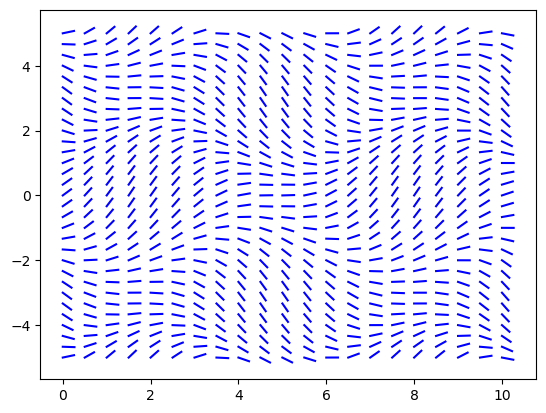

In [5]:
t0 = 0; t1 = 10; N = 21;
t = np.linspace(t0,t1,N)
y0 = -5; y1 = 5; M = 31;
y = np.linspace(y0,y1,M)
L = 0.8*min((t1-t0)/(N-1),(y1-y0)/(M-1))

f = lambda t,y: np.sin(t) + np.cos(y)

for n in range(0,N):
    for m in range(0,M):
        slope = f(t[n],y[m])
        theta = np.arctan(slope)
        dt = L*np.cos(theta)
        dy = L*np.sin(theta)
        plt.plot([t[n],t[n]+dt],[y[m],y[m]+dy],'b-')

## Euler Method

### Formulation 1

Write a function called `odeEuler` which takes `f` (function), `y0` (number), `steps` (number), `t0` (number), `tf` (number)  and returns `U` where first column are the `t` values from $t_0$ to $t_f$ and second column are the `y` values corresponding to the Euler's method approximation of the first order differential equations $y' = f(t,y)$ with initial condition $y(t_0) = y_0$.

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n) \ , \ \ y_0 = y(0)
$$

In [7]:
def odeEuler(f,y0,t0,tf,steps):
    U = np.zeros((steps+1,2))
    t = np.linspace(t0,tf,steps+1)
    y = np.zeros(steps+1)
    y[0] = y0
    for n in range(0,steps):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    U[:,0] = t
    U[:,1] = y
    return U

Note that this formulation only allows for equally spaced $t$ values.

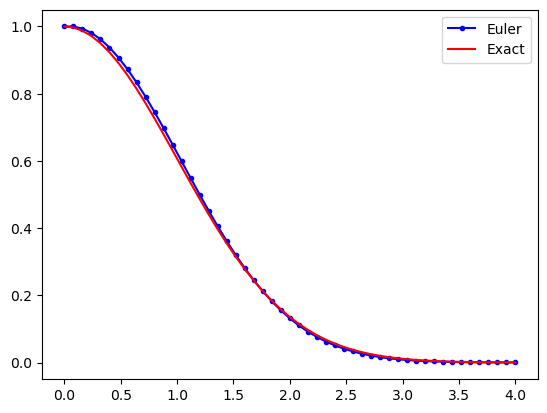

In [14]:
U = odeEuler(lambda t,y: -t*y,1,0,4,50)
t = U[:,0]
y = U[:,1]
plt.plot(t,y,'b.-',t,np.exp(-t**2/2),'r')
plt.legend(['Euler','Exact'])
plt.show()

### Formulation II

Write a function called `odeEuler` which takes `f`, `y0` and `t` (1D array) and returns 1D NumPy array `y` of values genrated by the Euler's method approximation of the first order differential equations $y' = f(t,y)$ with initial condition $y(t_0) = y_0$.

$$
y_{n+1} = y_n + f(t_n,y_n)(t_{n+1} - t_n) \ , \ \ y_0 = y(0)
$$

In [20]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

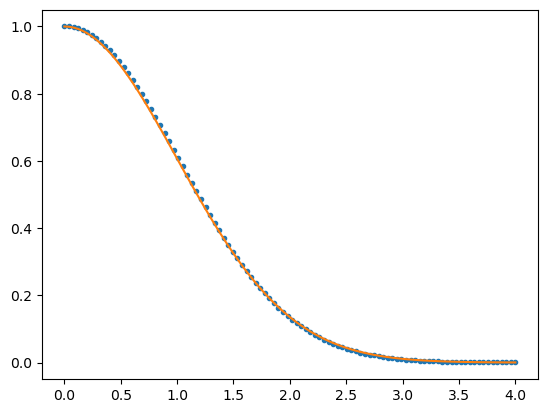

In [22]:
f = lambda t,y: -t*y
y0 = 1
t = np.linspace(0,4,100)
y = odeEuler(f,t,y0)
plt.plot(t,y,'.',t,np.exp(-t**2/2))
plt.show()

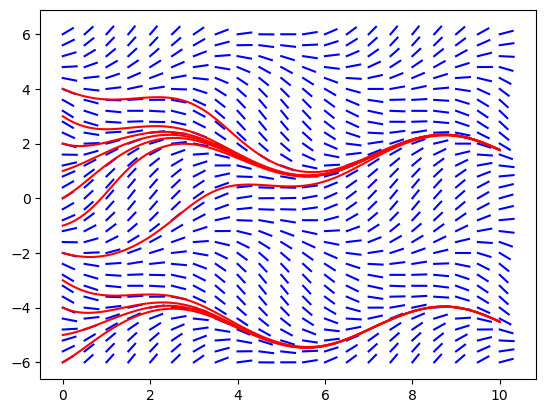

In [27]:
t0 = 0; t1 = 10; N = 21;
t = np.linspace(t0,t1,N)
y0 = -6; y1 = 6; M = 31;
y = np.linspace(y0,y1,M)
L = 0.8*min((t1-t0)/(N-1),(y1-y0)/(M-1))

f = lambda t,y: np.sin(t) + np.cos(y)

for n in range(0,N):
    for m in range(0,M):
        slope = f(t[n],y[m])
        theta = np.arctan(slope)
        dt = L*np.cos(theta)
        dy = L*np.sin(theta)
        plt.plot([t[n],t[n]+dt],[y[m],y[m]+dy],'b-')

t = np.linspace(t0,t1,100)
for y0 in range(-6,5):
    y = odeEuler(f,t,y0)
    plt.plot(t,y,'r')

plt.show()